

# Predict who will do a Term Deposit

## Table of Contents
* [1. Problem Statement](#1.-Problem-Statement)  
* [2. Objective](#2.-Objective) 
* [3. Import all scientific and visualization packages](#3.-Import-all-scientific-and-visualization-packages)
* [4. Loading the datasets](#4.-Loading-the-datasets)
    * [4.1 Understand datatypes present in dataframe](#4.1-Understand-datatypes-present-in-dataframe)
* [5. Data Visualization](#5.-Data-Visualization)
* [6.Prepare the data set](#6.Prepare the data set)
    * [6.1 Handle imbalanced data using SMOTE](#6.1-Handle imbalanced data using SMOTE)
    * [6.2 Train a Random Forest model before and after scaling the data set](#6.2-Train-a-Random Forest-model before and after scaling the data set)

### 1. Problem Statement

The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.The data set is imbalanced with 4521 instances and 17 columns.

 #### The dataset has the following attributes:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 Response Variable (desired target):__

17 - y - has the client subscribed to a __term deposit?__ (binary: "yes","no")

### 2. Objective

The Objective of this analysis is to Predict who will do a Term Deposit in the Financial Institution

### 3. Import all scientific and visualization packages

In [0]:
import pandas as pd                                                                                             # package to manipulate dataframe
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score       # Metrics to evaluate the model
import seaborn as sns                                                                                           # Visualization package
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier                                                             # Random Forest Classifier model
from sklearn.svm import SVC                                                                                     # Support Vector Classifier model
from sklearn.preprocessing import StandardScaler                                                                # For standardizing the dataset

### 4. Loading the dataset

In [15]:
!wget https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day3/Termdeposit.zip

--2019-08-06 10:48:00--  https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day3/Termdeposit.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65374 (64K) [application/zip]
Saving to: ‘Termdeposit.zip.1’

Termdeposit.zip.1   100%[===================>]  63.84K  --.-KB/s    in 0.02s   

2019-08-06 10:48:00 (2.59 MB/s) - ‘Termdeposit.zip.1’ saved [65374/65374]



In [16]:
!unzip Termdeposit.zip

Archive:  Termdeposit.zip.1
  inflating: Bank_Term_Deposit_Train.csv  
  inflating: Day1_Actual_output.xls  
  inflating: Day1_input.xls          
  inflating: Day2_Actual_output.xls  
  inflating: Day2_input.xls          
  inflating: Day3_Actual_output.xls  
  inflating: Day3_input.xls          
  inflating: Day4_Actual_output.xls  
  inflating: Day4_input.xls          


In [0]:
df=pd.read_csv("Bank_Term_Deposit_Train.csv")                                     # Read the dataframe

In [0]:
pd.options.display.max_columns=None                                               # Allows us to view all the columns

In [0]:
# Checking the first 5 rows of the dataframe

df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [0]:
df.shape                                                                          # Checking the number of rows and columns

(4413, 18)

In [0]:
del df['Unnamed: 0']                                                              # Removing the first column

#### 4.1 Understand datatypes present in dataframe

In [0]:
df.info()                                                                          # Checking the info, missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 17 columns):
age          4413 non-null int64
job          4413 non-null object
marital      4413 non-null object
education    4413 non-null object
default      4413 non-null object
balance      4413 non-null int64
housing      4413 non-null object
loan         4413 non-null object
contact      4413 non-null object
day          4413 non-null int64
month        4413 non-null object
duration     4413 non-null int64
campaign     4413 non-null int64
pdays        4413 non-null int64
previous     4413 non-null int64
poutcome     4413 non-null object
y            4413 non-null object
dtypes: int64(7), object(10)
memory usage: 586.2+ KB


In [0]:
df.isnull().sum()                                                                    # Checking the missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [0]:
df.y.value_counts()                                                                 # Find the total number of observations across all the classes given in Output var

no     3904
yes     509
Name: y, dtype: int64

In [0]:
df.describe()                                                                      # Checking the descriptive statistics

,age,balance,day,duration,campaign,pdays,previous
count,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000
mean,41.203716,1419.201224,15.921142,263.663494,2.800136,39.455472,0.537729
std,10.577605,3008.200835,8.252401,259.753338,3.124920,99.893990,1.689185
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1472.000000,21.000000,330.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### 5. Data Visualization

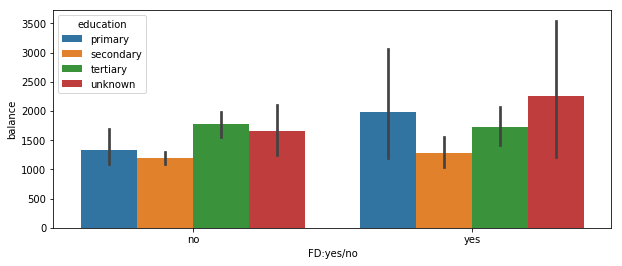

In [0]:
plt.figure(figsize=[10,4])                                      # Setting the size of the figure
sns.barplot(y=df['balance'],x=df['y'],hue=df.education)         # Bar plot
plt.xlabel("FD:yes/no")                                         # Setting the label in x axis
plt.show()                                                      # Displaying the plot

People who have term deposit have more balance in bank.  <br> 
This is because term deposit is a good investment scheme with high rate of interest.  <br>
People who have term deposit are more educated.

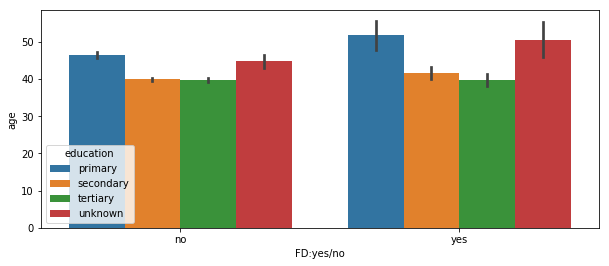

In [0]:
plt.figure(figsize=[10,4])                                        # Setting the size of the figure
sns.barplot(y=df['age'],x=df['y'],hue=df.education)               # Bar plot
plt.xlabel("FD:yes/no")                                           # Setting the label in x axis
plt.show()                                          

People who have term deposit have more age.  <br>
It can be deduced that aged people create term deposit to save their retirement benefit.

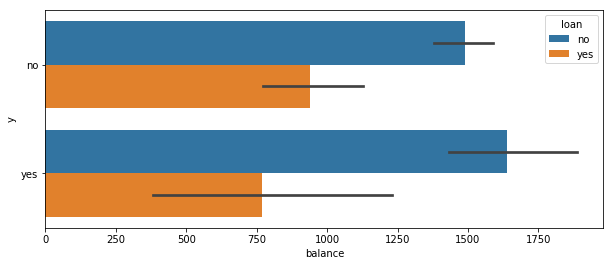

In [0]:
plt.figure(figsize=[10,4])                                           # Setting the size of the figure
sns.barplot(y=df['y'],x=df['balance'],hue=df.loan)                   # Bar plot
plt.show()

Those who have annual balance is close to 1500 euro and don't have loan are not doing Term Deposit. We should inspect more which factors are prohibiting them from doing a Term Deposit

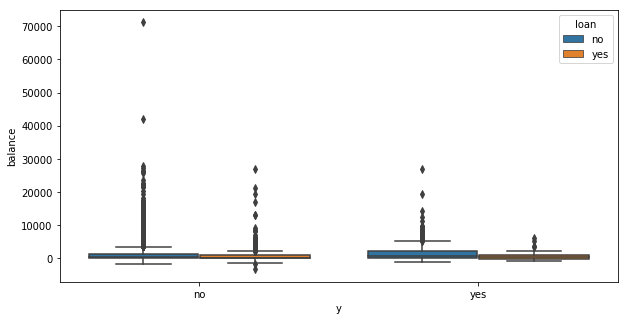

In [0]:
plt.figure(figsize=[10,5])                                           # Setting the size of the figure
sns.boxplot(x=df.y,y=df.balance,hue=df.loan)                         # Bar plot
plt.show()

We find some outliers in Annual balance in those who are not doing TD and having no loan

In [0]:
df[df.loan=='no'][df.y=='no'][df.balance>=1000][df.marital=='single'].shape[0] # 293 people having no loan,single and annual
# greater than equal to 1000 are not doing Term Deposit.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


293

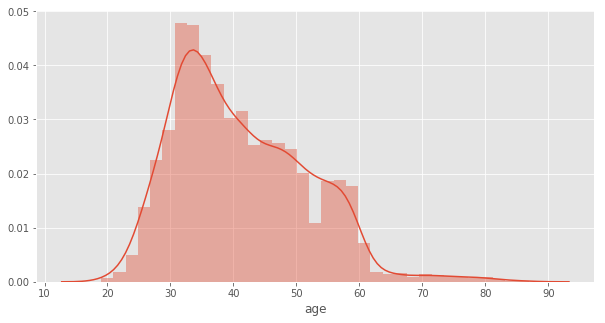

In [0]:
# Distribution plot of Age

from matplotlib import style
plt.figure(figsize=[10,5])
style.use('ggplot')
sns.distplot(df['age'])
plt.show()

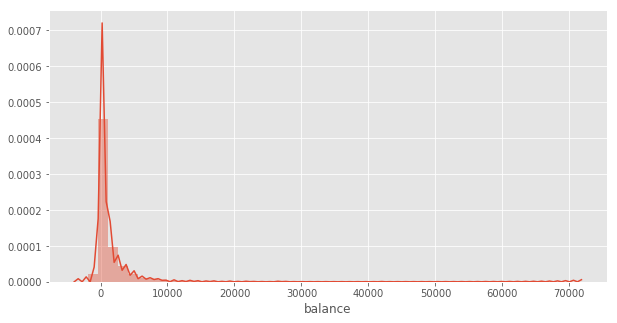

In [0]:
# Distribution plot of balance

from matplotlib import style
plt.figure(figsize=[10,5])
style.use('ggplot')
sns.distplot(df['balance'])
plt.show()

Balance variable is highly skewed to the right. Max number of people having low annual balance

###### Let's see how our Output variable looks like

In [0]:
df.y.value_counts()                       # Checking the number of values for each class

no     3904
yes     509
Name: y, dtype: int64

In [0]:
no=df['y']=='no'#.size()
no=no.sum()
yes=df['y']=='yes'
yes=yes.sum()

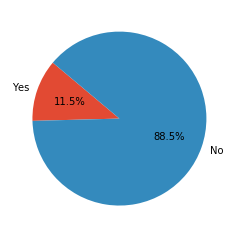

In [0]:
# Pie chart of both the classes

plt.figure(figsize=[4,4])
variables=['Yes','No']
values=[yes,no]
plt.pie(values,labels=variables,autopct='%1.1f%%', startangle=140)
plt.show()

In [0]:
# Creating the features and the labels

y=df['y']
X=df.drop(['y'],1)

In [0]:
x=X.copy()

In [0]:
df.shape                                         # Checking the number of rows and columns in the dataframe

(4413, 17)

In [0]:
# Getting the dummy values of job, marital, education, default, House, Loan, Contract, Month, poutcome

job_dummies=pd.get_dummies(X['job'],prefix='Job',drop_first=True)
marital_dummies=pd.get_dummies(X['marital'],prefix='Marital',drop_first=True)
edu_dummies=pd.get_dummies(X['education'],prefix='Edu',drop_first=True)
default_dummies=pd.get_dummies(X['default'],prefix='Default',drop_first=True)
housing_dummies=pd.get_dummies(X['housing'],prefix='House',drop_first=True)
loan_dummies=pd.get_dummies(X['loan'],prefix='Loan',drop_first=True)
contact_dummies=pd.get_dummies(X['contact'],prefix='Contact',drop_first=True)
month_dummies=pd.get_dummies(X['month'],prefix='Month',drop_first=True)
poutcome_dummies=pd.get_dummies(X['poutcome'],prefix='poutcome',drop_first=True)

In [0]:
# Merge all the dummified categorical columns

X=pd.concat([X,job_dummies,marital_dummies,edu_dummies,default_dummies,housing_dummies,loan_dummies,contact_dummies,month_dummies,poutcome_dummies],1)

In [0]:
# Removing the non-dummified categorical columns

X=X.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)
X.shape

(4413, 42)

#### Checking the shape of input and output variables

In [0]:
y.shape

(4413,)

In [0]:
X.shape

(4413, 42)

### Convert response variable into numeric one

In [0]:
# Label Encoding the y variable

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [0]:
y=le.fit_transform(y)

In [0]:
pd.crosstab(y,'Count')                            # This shows that the dataset is imbalanced and we need to perform SMOTE

col_0,Count
row_0,
0,3904
1,509


In [0]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Edu_secondary,Edu_tertiary,Edu_unknown,Default_yes,House_yes,Loan_yes,Contact_telephone,Contact_unknown,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### 6.1 Handle imbalanced data using SMOTE

#### Please install imblearn to balance the imbalanced data set

In [0]:
#!pip install imblearn

#### SMOTE is done for imbalanced data set.
We'll do over-sampling thus we can increase the number of instances while balancing the dataset

In [0]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority')
x_sm,y_sm=smote.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
print(x_sm.shape)
print(y_sm.shape)

(7808, 42)
(7808,)


In [0]:
# Splitting the data into train and test set and checking their shape

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.20,random_state=12)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6246, 42)
(1562, 42)
(6246,)
(1562,)


In [0]:
pd.Series(y_sm).value_counts()                          # After SMOTE the classes are balanced

1    3904
0    3904
dtype: int64

In [0]:
pd.Series(y_test).value_counts()

1    809
0    753
dtype: int64

In [0]:
#!pip install lightgbm                               # Installing LightGBM classifier

In [0]:
import lightgbm as lgb

In [0]:
train_data = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003                      # Learning rate 
params['boosting_type'] = 'gbdt'                     # Gradient Boosting Decision Tree
params['objective'] = 'binary'                       # Classify into binary classes
params['metric'] = 'binary_logloss'                  # metric is binary logloss
params['sub_feature'] = 0.5
params['num_leaves'] = 15                            # number of leaves in a full tree
params['min_data'] = 50                              # minimum number of data in the last leaf 
params['max_depth'] = 10                             # depth of tree
clf = lgb.train(params, train_data, 100)             # Train the model for 100 iteration

#### Prediction  train data

In [0]:
train_pred = clf.predict(x_train)

#### Prediction on test data

In [0]:
lightgbm_pred=clf.predict(x_test)

In [0]:

#convert into binary values
for i in range(0,6246):         # 6246 is the number of records
    if train_pred[i]>=.5:       # setting threshold to .5
       train_pred[i]=1
    else:  
       train_pred[i]=0

#### Train performance

In [0]:
print(accuracy_score(y_train, train_pred))            # Accuracy of the model

0.9081011847582453


In [0]:
print(classification_report(y_train, train_pred))     

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3151
           1       0.92      0.89      0.91      3095

    accuracy                           0.91      6246
   macro avg       0.91      0.91      0.91      6246
weighted avg       0.91      0.91      0.91      6246



#### Validation performance

In [0]:
y_pred=clf.predict(x_test)
#convert into binary values
for i in range(0,1562):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [0]:
y_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [0]:
# Checking all the metrics for the Test data

print(confusion_matrix(y_test, y_pred))                                # Print confusion matrix

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

print('accuracy_score \n',accuracy_score(y_test,y_pred))

print('classification_report \n',classification_report(y_test,y_pred))

[[704  49]
 [ 90 719]]
accuracy_score 
 0.91101152368758
classification_report 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       753
           1       0.94      0.89      0.91       809

    accuracy                           0.91      1562
   macro avg       0.91      0.91      0.91      1562
weighted avg       0.91      0.91      0.91      1562



In [0]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8887515451174289

### Prediction for upcoming four days

#### Day 1 prediction

#### Import Day 1 data

We have received Day1 data(Input)


Import day1_input

In [0]:
day1_input_df=pd.read_csv('Day1_input.xls')

In [0]:
day1_input_df.shape            # Rows and columns

(27, 16)

In [0]:
day1_input_df.tail()           # Check the last 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,60,admin.,married,unknown,no,1088,yes,no,cellular,26,may,149,1,-1,0,unknown
23,37,technician,single,secondary,no,228,yes,no,cellular,20,aug,1740,2,-1,0,unknown
24,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown
25,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown
26,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown


#### Feature Engineering the data from Day 1

In [0]:
new_input_features=x.append(day1_input_df)    # Add the last 5 days to train data

In [0]:
new_input_features.tail()                     # Check the last 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,60,admin.,married,unknown,no,1088,yes,no,cellular,26,may,149,1,-1,0,unknown
23,37,technician,single,secondary,no,228,yes,no,cellular,20,aug,1740,2,-1,0,unknown
24,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown
25,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown
26,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown


In [0]:
# Dummify categorical features 

job_dummies1=pd.get_dummies(new_input_features['job'],prefix='Job',drop_first=True)
marital_dummies1=pd.get_dummies(new_input_features['marital'],prefix='Marital',drop_first=True)
edu_dummies1=pd.get_dummies(new_input_features['education'],prefix='Edu',drop_first=True)
default_dummies1=pd.get_dummies(new_input_features['default'],prefix='Default',drop_first=True)
housing_dummies1=pd.get_dummies(new_input_features['housing'],prefix='House',drop_first=True)
loan_dummies1=pd.get_dummies(new_input_features['loan'],prefix='Loan',drop_first=True)
contact_dummies1=pd.get_dummies(new_input_features['contact'],prefix='Contact',drop_first=True)
month_dummies1=pd.get_dummies(new_input_features['month'],prefix='Month',drop_first=True)
poutcome_dummies1=pd.get_dummies(new_input_features['poutcome'],prefix='poutcome',drop_first=True)

In [0]:
new_input_features=pd.concat([new_input_features,job_dummies1,marital_dummies1,edu_dummies1,default_dummies1,housing_dummies1,loan_dummies1,contact_dummies1,month_dummies1,poutcome_dummies1],1)

In [0]:
new_input_features=new_input_features.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)

In [0]:
new_input_features.shape

(4440, 42)

In [0]:
# Removing the last 27 rows from the Day 1 data

onehot_encoded_new_input_features_day1=new_input_features.iloc[-27:,:]

In [0]:
onehot_encoded_new_input_features_day1.shape

(27, 42)

#### Predicting day1 data

In [0]:
day1_pred=clf.predict(onehot_encoded_new_input_features_day1)

In [0]:
for i in range(0,27):
    if day1_pred[i]>=.5:       # setting threshold to .5
       day1_pred[i]=1
    else:  
       day1_pred[i]=0

We have received actual what happend on day1(Actual day1_output)

In [0]:
day1_actual_output=pd.read_csv('Day1_Actual_output.xls')

In [0]:
day1_actual_output=le.fit_transform(day1_actual_output)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print(classification_report(day1_actual_output,day1_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        24
           1       0.38      1.00      0.55         3

    accuracy                           0.81        27
   macro avg       0.69      0.90      0.71        27
weighted avg       0.93      0.81      0.85        27



In [0]:
print(confusion_matrix(day1_actual_output,day1_pred))

[[19  5]
 [ 0  3]]


In [0]:
day1_recall=recall_score(day1_actual_output,day1_pred)
day1_recall

1.0

#### Data of Day 2 prediction

We have received Day2 data(Input)


Import day2_input

In [0]:
day2_input_df=pd.read_csv('Day2_input.xls')

In [0]:
day2_input_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,58,retired,married,primary,no,3401,yes,no,cellular,3,feb,84,3,265,2,failure
23,57,retired,married,primary,no,808,no,no,telephone,7,jul,274,1,-1,0,unknown
24,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown
25,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown
26,32,blue-collar,married,secondary,no,2089,yes,no,cellular,14,nov,132,1,-1,0,unknown


In [0]:
day2_input_df.shape

(27, 16)

#### Feature Engineering for Day 2

In [0]:
new_input_features1=x.append(day2_input_df)

In [0]:
new_input_features1.shape

(4440, 16)

In [0]:
job_dummies2=pd.get_dummies(new_input_features1['job'],prefix='Job',drop_first=True)
marital_dummies2=pd.get_dummies(new_input_features1['marital'],prefix='Marital',drop_first=True)
edu_dummies2=pd.get_dummies(new_input_features1['education'],prefix='Edu',drop_first=True)
default_dummies2=pd.get_dummies(new_input_features1['default'],prefix='Default',drop_first=True)
housing_dummies2=pd.get_dummies(new_input_features1['housing'],prefix='House',drop_first=True)
loan_dummies2=pd.get_dummies(new_input_features1['loan'],prefix='Loan',drop_first=True)
contact_dummies2=pd.get_dummies(new_input_features1['contact'],prefix='Contact',drop_first=True)
month_dummies2=pd.get_dummies(new_input_features1['month'],prefix='Month',drop_first=True)
poutcome_dummies2=pd.get_dummies(new_input_features1['poutcome'],prefix='poutcome',drop_first=True)

In [0]:
new_input_features1=pd.concat([new_input_features1,job_dummies2,marital_dummies2,edu_dummies2,default_dummies2,housing_dummies2,loan_dummies2,contact_dummies2,month_dummies2,poutcome_dummies2],1)

In [0]:
new_input_features1.shape

(4440, 51)

In [0]:
new_input_features1=new_input_features1.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)

In [0]:
new_input_features1.shape

(4440, 42)

In [0]:
new_input_features1.tail()

,age,balance,day,duration,campaign,pdays,previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Edu_secondary,Edu_tertiary,Edu_unknown,Default_yes,House_yes,Loan_yes,Contact_telephone,Contact_unknown,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown
22,58,3401,3,84,3,265,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23,57,808,7,274,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
24,49,1235,13,354,3,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
25,78,229,22,97,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
26,32,2089,14,132,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [0]:
onehot_encoded_new_input_features_day2=new_input_features1.iloc[-27:,:]

In [0]:
onehot_encoded_new_input_features_day2.shape

(27, 42)

In [0]:
day2_pred=clf.predict(onehot_encoded_new_input_features_day2)

In [0]:
for i in range(0,27):
    if day2_pred[i]>=.5:       # setting threshold to .5
       day2_pred[i]=1
    else:  
       day2_pred[i]=0

We have received actual what happend on day2(Actual day2_output)

In [0]:
day2_Actual_output=pd.read_csv('Day2_Actual_output.xls')

In [0]:
day2_actual_output=le.fit_transform(day2_Actual_output)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print(classification_report(day2_actual_output,day2_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.50      0.33      0.40         3

    accuracy                           0.89        27
   macro avg       0.71      0.65      0.67        27
weighted avg       0.87      0.89      0.88        27



In [0]:
print(confusion_matrix(day2_actual_output,day2_pred))

[[23  1]
 [ 2  1]]


In [0]:
day2_recall=recall_score(day2_actual_output,day2_pred)
day2_recall

0.3333333333333333

#### Prediction for Day 3

We have received Day3 data(Input)


Import day3_input

In [0]:
day3_input_df=pd.read_csv('Day3_input.xls')

In [0]:
day3_input_df.shape

(27, 16)

In [0]:
day3_input_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,58,unemployed,married,secondary,no,610,yes,no,telephone,29,jul,246,2,-1,0,unknown
23,34,admin.,married,tertiary,no,35,yes,no,cellular,15,oct,76,1,69,2,failure
24,33,management,married,secondary,no,3935,yes,no,cellular,6,may,765,1,342,2,failure
25,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success
26,45,blue-collar,divorced,primary,no,844,no,no,unknown,5,jun,1018,3,-1,0,unknown


#### Feature Engineering for Day 3

In [0]:
new_input_features2=x.append(day3_input_df)

In [0]:
new_input_features2.shape

(4440, 16)

In [0]:
job_dummies3=pd.get_dummies(new_input_features2['job'],prefix='Job',drop_first=True)
marital_dummies3=pd.get_dummies(new_input_features2['marital'],prefix='Marital',drop_first=True)
edu_dummies3=pd.get_dummies(new_input_features2['education'],prefix='Edu',drop_first=True)
default_dummies3=pd.get_dummies(new_input_features2['default'],prefix='Default',drop_first=True)
housing_dummies3=pd.get_dummies(new_input_features2['housing'],prefix='House',drop_first=True)
loan_dummies3=pd.get_dummies(new_input_features2['loan'],prefix='Loan',drop_first=True)
contact_dummies3=pd.get_dummies(new_input_features2['contact'],prefix='Contact',drop_first=True)
month_dummies3=pd.get_dummies(new_input_features2['month'],prefix='Month',drop_first=True)
poutcome_dummies3=pd.get_dummies(new_input_features2['poutcome'],prefix='poutcome',drop_first=True)

In [0]:
new_input_features2=pd.concat([new_input_features2,job_dummies3,marital_dummies3,edu_dummies3,default_dummies3,housing_dummies3,loan_dummies3,contact_dummies3,month_dummies3,poutcome_dummies3],1)

In [0]:
new_input_features2=new_input_features2.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)

In [0]:
new_input_features2.shape

(4440, 42)

In [0]:
onehot_encoded_new_input_features_day3=new_input_features2.iloc[-27:,:]

In [0]:
onehot_encoded_new_input_features_day3.tail()

,age,balance,day,duration,campaign,pdays,previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Edu_secondary,Edu_tertiary,Edu_unknown,Default_yes,House_yes,Loan_yes,Contact_telephone,Contact_unknown,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown
22,58,610,29,246,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
23,34,35,15,76,1,69,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
24,33,3935,6,765,1,342,2,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
25,61,4629,27,181,1,92,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
26,45,844,5,1018,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [0]:
onehot_encoded_new_input_features_day3.shape

(27, 42)

#### Predicting day 3 data

We have received data of day 3(Input features) and we will predict the labels using clf model

In [0]:
day3_pred=clf.predict(onehot_encoded_new_input_features_day3)

In [0]:
for i in range(0,27):
    if day3_pred[i]>=.5:       # setting threshold to .5
       day3_pred[i]=1
    else:  
       day3_pred[i]=0

We have received actual what happend on day3(Actual day3_output)

In [0]:
day3_Actual_output=pd.read_csv('Day3_Actual_output.xls')

In [0]:
day3_Actual_output=le.fit_transform(day3_Actual_output)
pd.crosstab(day3_Actual_output,'count')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


col_0,count
row_0,
0,24
1,3


In [0]:
print(classification_report(day3_Actual_output,day3_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.33      0.33      0.33         3

    accuracy                           0.85        27
   macro avg       0.62      0.62      0.62        27
weighted avg       0.85      0.85      0.85        27



In [0]:
day3_recall=recall_score(day3_Actual_output,day3_pred)
day3_recall

0.3333333333333333

In [0]:
print(confusion_matrix(day3_Actual_output,day3_pred))

[[22  2]
 [ 2  1]]


#### Prediction for Day 4

Predicting day 4 data


We have received data of day 4(Input features) and we will predict the labels using clf model

In [0]:
day4_input_df=pd.read_csv('Day4_input.xls')

In [0]:
day4_input_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,39,admin.,divorced,secondary,no,83,yes,no,cellular,30,jul,69,6,-1,0,unknown
23,59,admin.,married,secondary,no,817,no,no,cellular,9,apr,304,1,-1,0,unknown
24,34,technician,married,tertiary,no,1539,yes,no,cellular,15,jun,441,1,56,1,other
25,37,management,married,tertiary,no,0,no,no,cellular,16,jul,268,2,182,3,success
26,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,652,1,-1,0,unknown


In [0]:
day4_input_df.shape

(27, 16)

#### Feature Engineering for Day 4

In [0]:
new_input_features3=x.append(day4_input_df)

In [0]:
new_input_features3.shape

(4440, 16)

In [0]:
job_dummies4=pd.get_dummies(new_input_features3['job'],prefix='Job',drop_first=True)
marital_dummies4=pd.get_dummies(new_input_features3['marital'],prefix='Marital',drop_first=True)
edu_dummies4=pd.get_dummies(new_input_features3['education'],prefix='Edu',drop_first=True)
default_dummies4=pd.get_dummies(new_input_features3['default'],prefix='Default',drop_first=True)
housing_dummies4=pd.get_dummies(new_input_features3['housing'],prefix='House',drop_first=True)
loan_dummies4=pd.get_dummies(new_input_features3['loan'],prefix='Loan',drop_first=True)
contact_dummies4=pd.get_dummies(new_input_features3['contact'],prefix='Contact',drop_first=True)
month_dummies4=pd.get_dummies(new_input_features3['month'],prefix='Month',drop_first=True)
poutcome_dummies4=pd.get_dummies(new_input_features3['poutcome'],prefix='poutcome',drop_first=True)

In [0]:
new_input_features3=pd.concat([new_input_features3,job_dummies4,marital_dummies4,edu_dummies4,default_dummies4,housing_dummies4,loan_dummies4,contact_dummies4,month_dummies4,poutcome_dummies4],1)

In [0]:
new_input_features3=new_input_features3.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)

In [0]:
new_input_features3.shape

(4440, 42)

In [0]:
onehot_encoded_new_input_features_day4=new_input_features3.iloc[-27:,:]

In [0]:
onehot_encoded_new_input_features_day4.tail()

,age,balance,day,duration,campaign,pdays,previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Edu_secondary,Edu_tertiary,Edu_unknown,Default_yes,House_yes,Loan_yes,Contact_telephone,Contact_unknown,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown
22,39,83,30,69,6,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
23,59,817,9,304,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24,34,1539,15,441,1,56,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
25,37,0,16,268,2,182,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
26,27,451,16,652,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Predicting day 4 data
We have received data of day 4(Input features) and we will predict the labels using clf model


In [0]:
day4_pred=clf.predict(onehot_encoded_new_input_features_day4)

In [0]:
for i in range(0,27):
    if day4_pred[i]>=.5:       # setting threshold to .5
       day4_pred[i]=1
    else:  
       day4_pred[i]=0

We have received actual what happend on day3(Actual day3_output)

In [0]:
day4_actual_output=pd.read_csv('Day4_Actual_output.xls')

In [0]:
day4_actual_output=le.fit_transform(day4_actual_output)
pd.crosstab(day4_actual_output,'count')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


col_0,count
row_0,
0,24
1,3


In [0]:
print(classification_report(day4_actual_output,day4_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.67      0.67      0.67         3

    accuracy                           0.93        27
   macro avg       0.81      0.81      0.81        27
weighted avg       0.93      0.93      0.93        27



In [0]:
day4_recall=recall_score(day4_actual_output,day4_pred)
day4_recall

0.6666666666666666

In [0]:
print(confusion_matrix(day4_actual_output,day4_pred))

[[23  1]
 [ 1  2]]


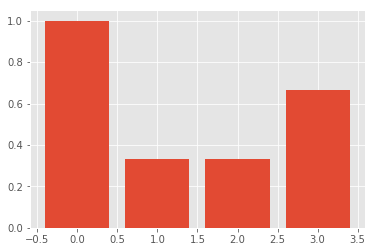

In [0]:
all_recall = [day1_recall, day2_recall, day3_recall, day4_recall]

a=range(0,4)
plt.bar(a,all_recall)
plt.show()

#### Retrain the model with day 1,2,3 and 4 data

In [0]:
import numpy as np

In [0]:
retrain_X=pd.concat([X,onehot_encoded_new_input_features_day1,onehot_encoded_new_input_features_day2,
                    onehot_encoded_new_input_features_day3,onehot_encoded_new_input_features_day4],axis=0)

In [0]:
Y=np.concatenate((y,day1_actual_output,day2_actual_output,day3_Actual_output,day4_actual_output),axis=0)

In [0]:
Y.shape

(4521,)

In [0]:
retrain_X.shape

(4521, 42)

In [0]:
smote=SMOTE(ratio='minority')
X_sm,Y_sm=smote.fit_sample(retrain_X,Y)

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,test_size=0.20,random_state=1234)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6400, 42)
(1600, 42)
(6400,)
(1600,)


In [0]:
d_train = lgb.Dataset(X_train, label=Y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 15
params['min_data'] = 50
params['max_depth'] = 10
clf1 = lgb.train(params, d_train, 100)

In [0]:
final_y_pred=clf1.predict(X_test)

In [0]:
for i in range(0,1600):
    if final_y_pred[i]>=0.5:
       final_y_pred[i]=1
    else:
       final_y_pred[i]=0

In [0]:
print('Accuracy\n',accuracy_score(Y_test,final_y_pred))

Accuracy
 0.895625


In [0]:
print('classification_report\n',classification_report(Y_test,final_y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       801
           1       0.89      0.90      0.90       799

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [0]:
print('confusion_matrix\n',confusion_matrix(Y_test,final_y_pred))

confusion_matrix
 [[713  88]
 [ 79 720]]


#### Compare Recall_score of final model with previous one

In [0]:
print(recall_score(y_test,y_pred))  # First model

0.8887515451174289


In [0]:
print(recall_score(Y_test,final_y_pred))  # Final model

0.9011264080100125


An improvement in recall score is obsevered in the final model built on the entire data
Thus we can retrain our existing model to find performance of the model on more data

#### Training a Random Forest Classifier on the entire data

In [0]:
rf=RandomForestClassifier() # Define the classifier

##### 6.2 Train a Random Forest model

In [0]:
rf_model=rf.fit(X_train,Y_train)
rf_train_pred=rf_model.predict(X_train)
print(accuracy_score(Y_train,rf_train_pred))

0.996875


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### Validate the model on validation data

In [0]:
rf_test_pred=rf_model.predict(X_test)
print(accuracy_score(rf_test_pred,Y_test))

0.92875


In [0]:
print(confusion_matrix(Y_test,rf_test_pred))
print('classification_report \n',classification_report(rf_test_pred,Y_test))

[[752  49]
 [ 65 734]]
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       817
           1       0.92      0.94      0.93       783

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



#### Recall score of RandomForest model

In [0]:
rf_recall=recall_score(rf_test_pred,Y_test)
rf_recall

0.9374201787994891

#### Recall Score of LightGBM model

In [0]:
lightGBM_recall=recall_score(Y_test,final_y_pred)
lightGBM_recall

0.9011264080100125

#### We can conclude that the performance of Random forest is better than LightGBM in terms of all the classification performance metrics

## Let's find ROC-AUC score and curve of Random forest model

In [0]:
predict_probabilities = rf_model.predict_proba(X_test)[:,1]

In [0]:
ROCAUC=roc_auc_score(Y_test,rf_test_pred)
ROCAUC

0.9287373886521697

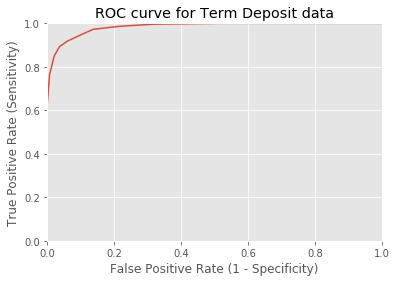

In [0]:
fpr, tpr, thresholds = roc_curve(Y_test, predict_probabilities)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Term Deposit data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#### Scaling is required because attributes values given are in different scales
We have used Standard Scaler, It converts the entire data mean 0 and Standard Deviation 1 and you can scale the input data and train a model on your own